In [61]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from copy import deepcopy

In [62]:
data = pd.read_csv("ap-northeast-1.csv")

In [63]:
data.columns= ['time', 'arch', 'OS', 'ap-northeast', 'cost']

In [64]:
data = data[(data['arch'].str.startswith('i')) & (data['OS'].str.startswith('W'))]

In [65]:
uniq_arch = list(data.arch.unique())
uniq_arch

['i2.xlarge',
 'i3.xlarge',
 'i2.4xlarge',
 'i2.2xlarge',
 'i3.16xlarge',
 'i3.2xlarge',
 'i3.4xlarge',
 'i3.large',
 'i2.8xlarge',
 'i3.8xlarge']

In [66]:
data['day'] = data['time']

In [67]:
data.head()

,time,arch,OS,ap-northeast,cost,day
35,2017-05-08 21:45:01+00:00,i2.xlarge,Windows,ap-northeast-1a,0.212,2017-05-08 21:45:01+00:00
36,2017-05-08 21:45:01+00:00,i2.xlarge,Windows,ap-northeast-1c,0.212,2017-05-08 21:45:01+00:00
90,2017-05-08 21:42:29+00:00,i2.xlarge,Windows,ap-northeast-1a,0.221,2017-05-08 21:42:29+00:00
174,2017-05-08 21:39:07+00:00,i3.xlarge,Windows,ap-northeast-1a,0.220,2017-05-08 21:39:07+00:00
175,2017-05-08 21:39:07+00:00,i3.xlarge,Windows,ap-northeast-1c,0.220,2017-05-08 21:39:07+00:00


In [68]:
data['day'] = data['day'].str[5:10]

In [69]:
data.head()

,time,arch,OS,ap-northeast,cost,day
35,2017-05-08 21:45:01+00:00,i2.xlarge,Windows,ap-northeast-1a,0.212,05-08
36,2017-05-08 21:45:01+00:00,i2.xlarge,Windows,ap-northeast-1c,0.212,05-08
90,2017-05-08 21:42:29+00:00,i2.xlarge,Windows,ap-northeast-1a,0.221,05-08
174,2017-05-08 21:39:07+00:00,i3.xlarge,Windows,ap-northeast-1a,0.220,05-08
175,2017-05-08 21:39:07+00:00,i3.xlarge,Windows,ap-northeast-1c,0.220,05-08


In [70]:
data.sort_values('day', inplace=True)

In [71]:
data.head()

,time,arch,OS,ap-northeast,cost,day
1956356,2017-03-30 07:36:21+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2157,03-30
1920521,2017-03-30 18:51:06+00:00,i2.8xlarge,Windows,ap-northeast-1c,2.0510,03-30
1920541,2017-03-30 18:50:59+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2159,03-30
1920543,2017-03-30 18:50:48+00:00,i2.8xlarge,Windows,ap-northeast-1c,1.8010,03-30
1920548,2017-03-30 18:50:38+00:00,i2.8xlarge,Windows,ap-northeast-1a,1.7529,03-30


In [72]:
data = data.groupby(['arch', 'day'], as_index=True).agg('median')

In [73]:
data.head()

cost
arch       day          
i2.2xlarge 03-30  0.4535
           03-31  0.4479
           04-01  0.4456
           04-02  0.4456
           04-03  0.4479

In [74]:
data_copy = deepcopy(data)

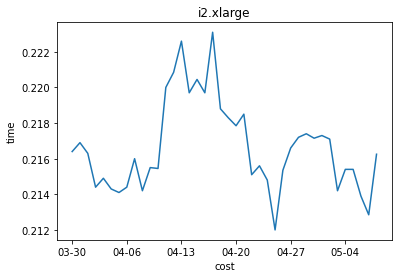

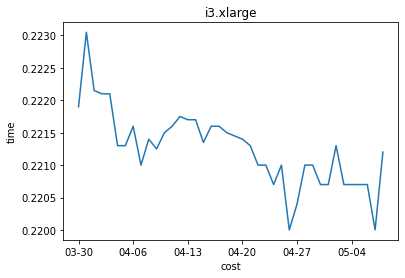

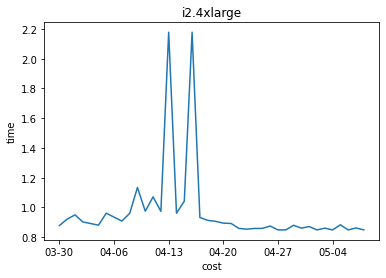

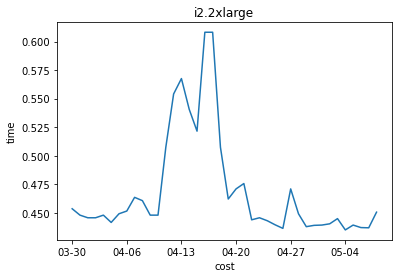

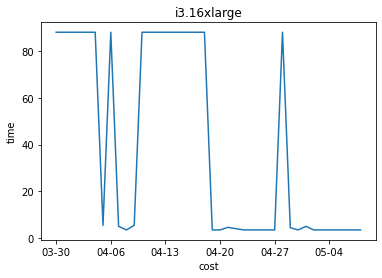

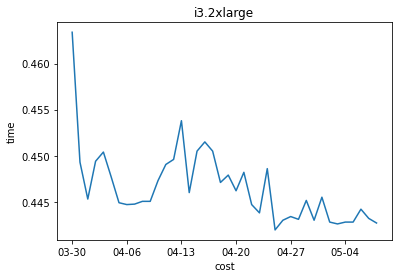

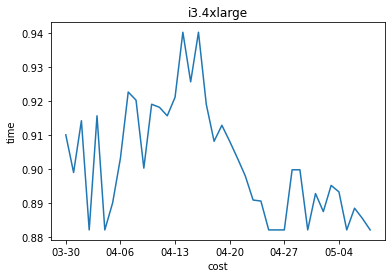

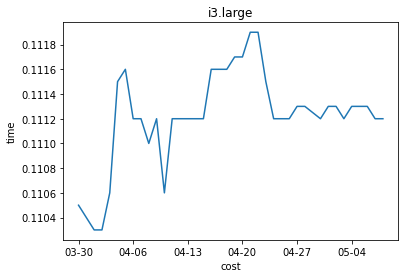

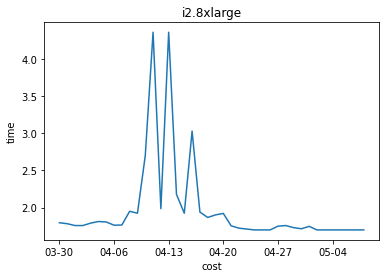

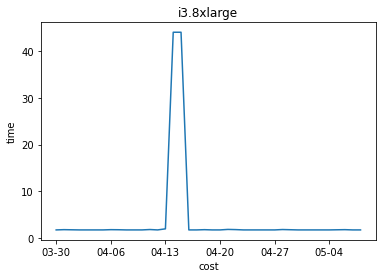

In [76]:
for i in uniq_arch:
    data = data_copy.loc[i]
    plt.plot(data.index, data['cost'], label='ff')
    plt.title(i)
    plt.xlabel('cost')
    plt.ylabel('time')
    plt.xticks(('03-30', '04-06', '04-13', '04-20', '04-27', '05-04'))
    plt.show()